In [1]:
import pandas as pd

path = r"/Users/moazam_a12/Learning Curve/Academia/UET/Semester 6/Introduction to Data Sceince/Project/Datasets/Parking Birmingham (D-3)/parking+birmingham.csv"

# Loading Parking Birmingham dataset
df_parking = pd.read_csv(path)

# Preview the data
df_parking.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [3]:
# Summary
df_parking.info()

# Check missing values
df_parking.isnull().sum()

# Describe numeric columns
df_parking.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35717 non-null  object
 1   Capacity          35717 non-null  int64 
 2   Occupancy         35717 non-null  int64 
 3   LastUpdated       35717 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


,Capacity,Occupancy
count,35717.000000,35717.000000
mean,1397.550130,642.228911
std,1179.326833,656.955535
min,220.000000,-8.000000
25%,500.000000,210.000000
50%,849.000000,446.000000
75%,2009.000000,798.000000
max,4675.000000,4327.000000


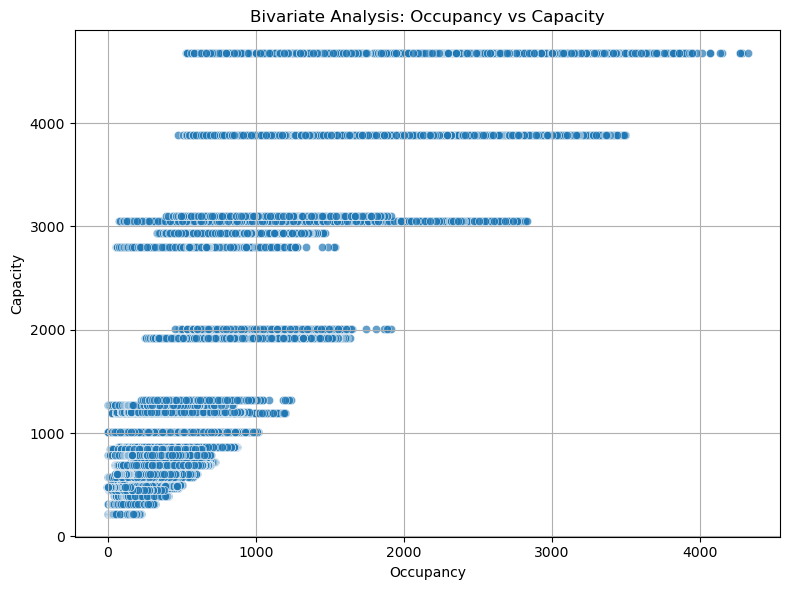

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_parking, x='Occupancy', y='Capacity', alpha=0.7)
plt.title('Bivariate Analysis: Occupancy vs Capacity')
plt.xlabel('Occupancy')
plt.ylabel('Capacity')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

# Select numeric features
features = df_parking[['Occupancy', 'Capacity']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

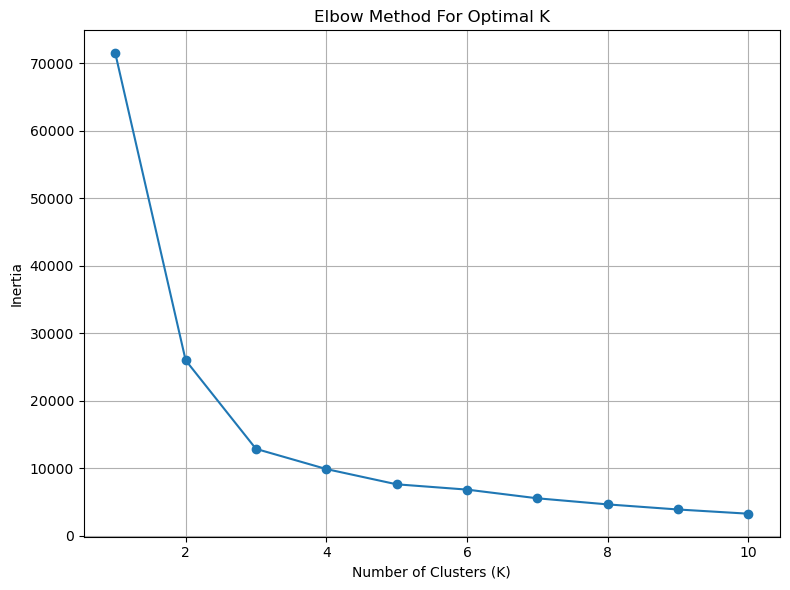

In [11]:
from sklearn.cluster import KMeans

inertia = []

# Try K from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# K-Means with K = 3
kmeans = KMeans(n_clusters=3, random_state=42)
df_parking['Cluster'] = kmeans.fit_predict(X_scaled)

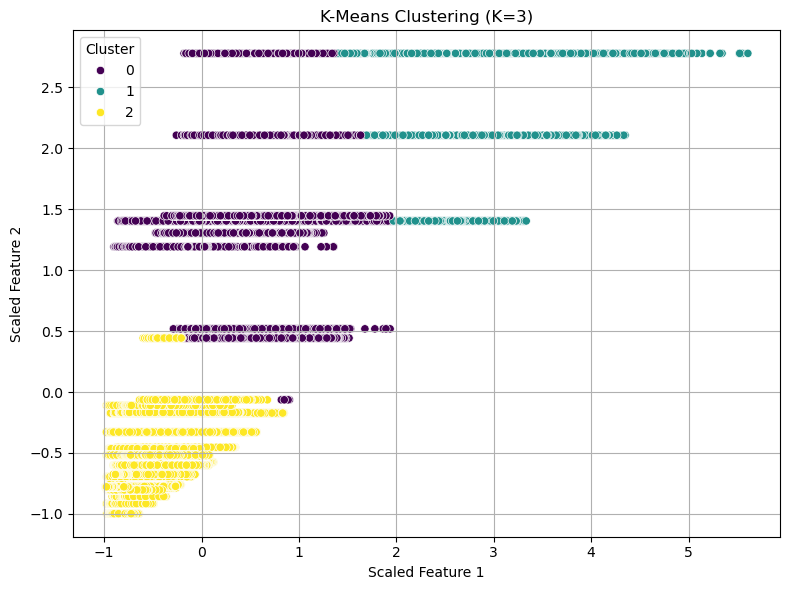

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_parking['Cluster'], palette='viridis')
plt.title('K-Means Clustering (K=3)')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.grid(True)
plt.tight_layout()
plt.show()

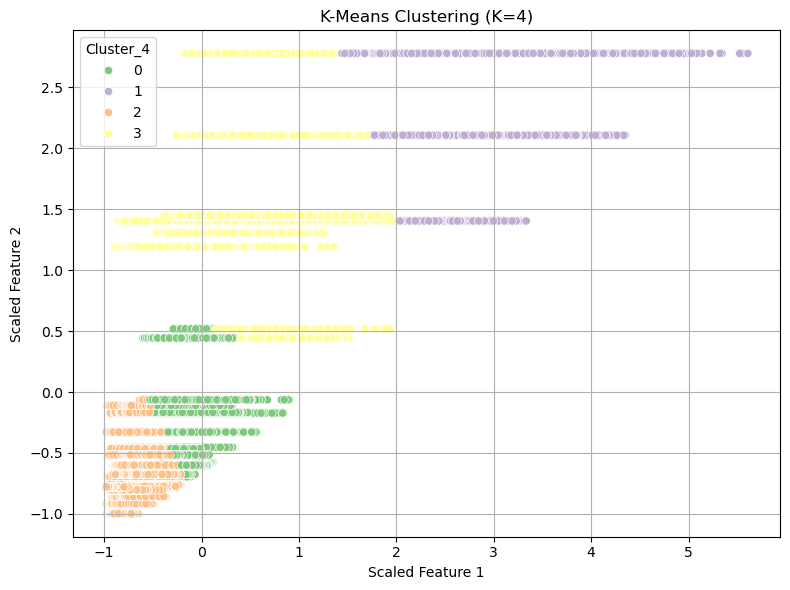

In [23]:
# Repeating with K = 4
kmeans4 = KMeans(n_clusters=4, random_state=42)
df_parking['Cluster_4'] = kmeans4.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_parking['Cluster_4'], palette='Accent')
plt.title('K-Means Clustering (K=4)')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.grid(True)
plt.tight_layout()
plt.show()